# Considerações iniciais sobre o dataset

## Import das bibliotecas para uso no trabalho

In [1]:
from json import dump as json_dump, load as json_load, dumps
import os
import requests
import math
from tqdm import tqdm, trange
from time import sleep
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Biblioteca que permite plots mais robustos que o plt
from scipy import stats


## Leitura dos dados

Download do dataset disponibilizado no github

In [2]:
!curl -L -o dataset.csv https://github.com/bgvinicius/fortaleza-rents-dataset/raw/master/full_rents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3970k  100 3970k    0     0  3207k      0  0:00:01  0:00:01 --:--:-- 24.4M


In [3]:
df = pd.read_csv("dataset.csv")
df.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
df.head()

,amenities,usableAreas,description,title,unitTypes,parkingSpaces,suites,bathrooms,usageTypes,bedrooms,neighborhood,lat,lon,condoFee,rentPrice,iptu
0,"['ELEVATOR', 'GATED_COMMUNITY', 'GARDEN', 'PLA...",70.0,IMÓVEL IMPECÁVEL! L I N D A V I S T A M A R! <...,Apartamento para aluguel tem 70 metros quadrad...,APARTMENT,2.0,2.0,2.0,RESIDENTIAL,2.0,Meireles,-3.727880,-38.495875,730,2700,110
1,"['FURNISHED', 'BARBECUE_GRILL', 'ELEVATOR', 'G...",60.0,"Apartamento Duplex 60 m2, com 02 suítes, total...","Apartamento DUPLEX MOBILIADO, 02 suítes, em Me...",APARTMENT,1.0,2.0,2.0,RESIDENTIAL,2.0,Meireles,-3.727192,-38.490351,800,2500,200
2,"['AIR_CONDITIONING', 'PORCELAIN']",35.0,ANDAR ALTO;<br>PISO EM PORCELANATO;<br>ILUMINA...,"Sala comercial, localização INENARRÁVEL / para...",OFFICE,0.0,0.0,0.0,COMMERCIAL,0.0,Meireles,-3.736109,-38.490084,575,2500,330
3,[],33.0,"Salas com piso em porcelanato bianco, com forr...",Scopa Platinum Corporate - Salas amplas com WC,OFFICE,1.0,0.0,0.0,COMMERCIAL,0.0,Aldeota,-3.733264,-38.509330,428,1750,1143
4,[],30.0,COMPSA – COMPARTILHAMENTO DE SALAS: <br>I. MOB...,"COMPSA - Compartilhamento de Salas - Hora, Exp...",OFFICE,0.0,0.0,0.0,COMMERCIAL,0.0,Aldeota,-3.743591,-38.493051,0,500,0


In [4]:
print('Tipos de cada atributo:\n{}'.format(df.dtypes))

Tipos de cada atributo:
amenities         object
usableAreas      float64
description       object
title             object
unitTypes         object
parkingSpaces    float64
suites           float64
bathrooms        float64
usageTypes        object
bedrooms         float64
neighborhood      object
lat              float64
lon              float64
condoFee           int64
rentPrice          int64
iptu               int64
dtype: object


Como podemos ver acima, o dataset possui tanto atributos categóricos como atributos contínuos e ordinais


**Atributos categóricos**

- amenities
- description
- title
- unitTypes
- usageTypes
- neighborhood

**Atributos contínuos**

- usableAreas
- condoFee
- rentPrice
- iptu

**Atributos ordinais**
- parkingSpaces
- suites
- bathrooms
- bedrooms

# Análise Estatística dos dados

## Atributos contínuos

Inicialmente, vamos analisar as estatísticas básicas dos dados contínuos, como sua média e desvio padrão.

In [5]:
cont_attributes = ["usableAreas", "condoFee", "rentPrice", "iptu"]

df[cont_attributes].describe()

,usableAreas,condoFee,rentPrice,iptu
count,7492.000000,7.492000e+03,7492.000000,7492.000000
mean,302.293647,4.309800e+02,4145.321410,541.140416
std,1354.555366,1.560991e+04,17299.313716,10470.449313
min,0.000000,0.000000e+00,99.000000,0.000000
25%,37.000000,0.000000e+00,750.000000,0.000000
50%,63.000000,0.000000e+00,1300.000000,0.000000
75%,147.000000,3.200000e+02,3000.000000,70.250000
max,70526.000000,1.350000e+06,699000.000000,571362.000000


Perceba que nesses 4 atributos, existe uma grande discrepância entre o valor máximo do atributo e o percentil 75%! Que indica a presença de outliers no dataset.

Agora, vamos analisar histogramas para cada atributo.

### Histogramas

Usaremos os histogramas para ter uma ideia inicial de como os dados estão distribuídos

#### usableAreas

Percentil 75 aqui é 147 contudo valor máximo da coluna vai até 70526, provavelmente um outlier, por isso consideramos para área valores até 1000 para o gráfico

<AxesSubplot:xlabel='usableAreas', ylabel='Count'>

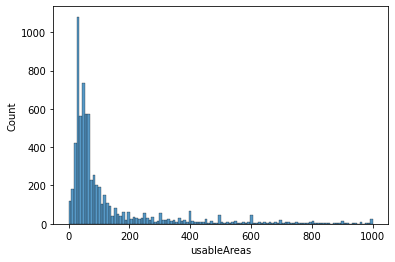

In [6]:
sns.histplot(data=df['usableAreas'], binrange=(0, 1000))

#### condoFee

A taxa de condomínio, seu percentil 75 vai até R\$ 320, contudo, nessa coluna o maior valor é até R\$ 1350000! Um provável outlier, portanto, vamos limitar os valores nessa coluna até R\$ 450, que é bem próximo da média.

<AxesSubplot:xlabel='condoFee', ylabel='Count'>

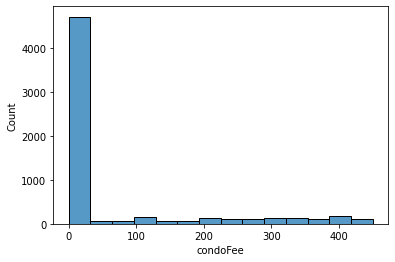

In [7]:
sns.histplot(data=df['condoFee'], binrange=(0, 450))

#### rentPrice



Para esse atributo, vamos considerar como valor máximo para o aluguel R\$ 50 000, um valor bem acima da média e percentil 75 do dataset.

<AxesSubplot:xlabel='rentPrice', ylabel='Count'>

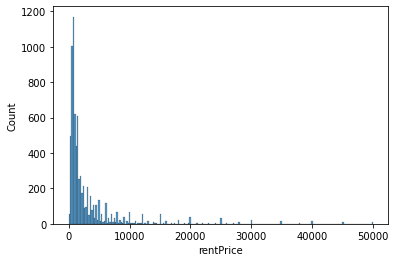

In [8]:
sns.histplot(data=df['rentPrice'], binrange=(0, 50000))

#### iptu

A maior parte dos valores de IPTU são 0, além disso, a média do atributo é de R\$ 500, portanto, vamos colocar como limite para o histograma o valor de R\$ 1000.

<AxesSubplot:xlabel='iptu', ylabel='Count'>

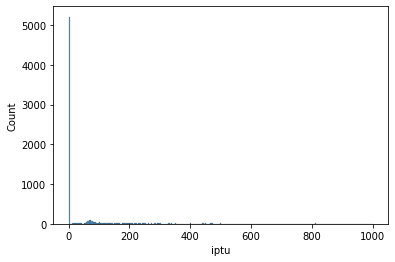

In [9]:
sns.histplot(data=df['iptu'], binrange=(0, 1000))

### Box plot e violin plot

Como podemos ver com os histogramas, existem alguns valores extremos, o box plot pode nos ajudar a visualizar estes valores. Além disso, também vamos usar o violin plot, que é uma técnica um pouco mais robusta que o box plot e pode nos fornecer insights adicionais

In [10]:
def plot_boxplot_with_violinplot(key):
  f = plt.figure(figsize=(20, 6))
  gs = f.add_gridspec(1, 2)

  f.add_subplot(gs[0, 0])

  sns.boxplot(data=df[key], orient="h")

  f.add_subplot(gs[0, 1])

  sns.violinplot(data=df[key], orient="h")


#### usableAreas

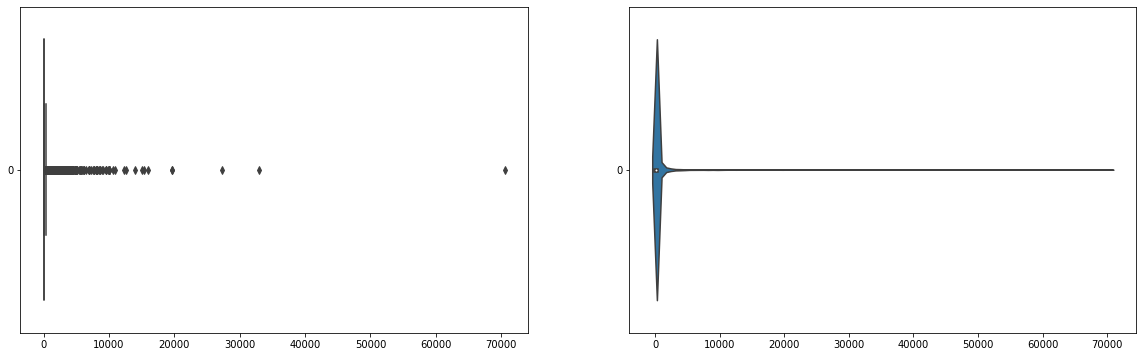

In [11]:
plot_boxplot_with_violinplot("usableAreas")

#### condoFee

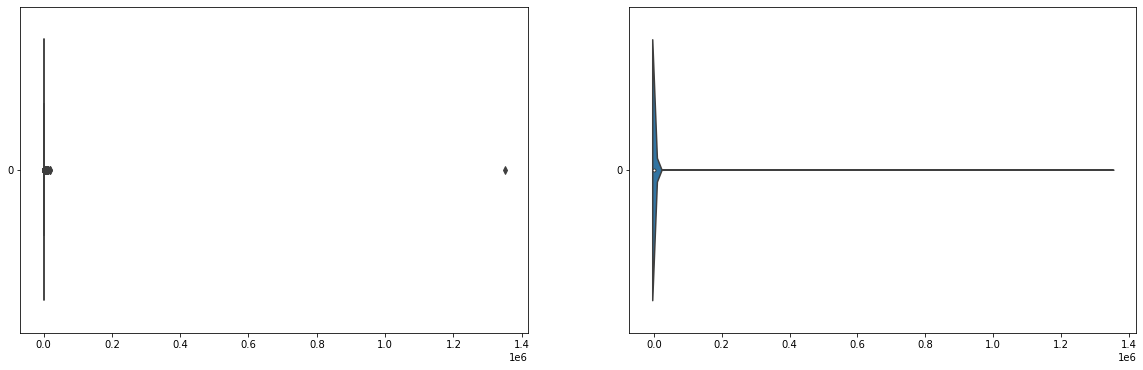

In [12]:
plot_boxplot_with_violinplot("condoFee")

#### rentPrice

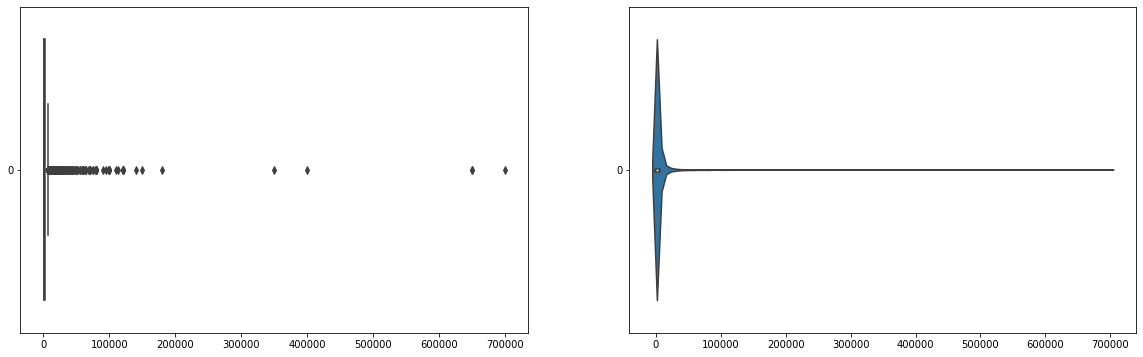

In [13]:
plot_boxplot_with_violinplot("rentPrice")

#### iptu

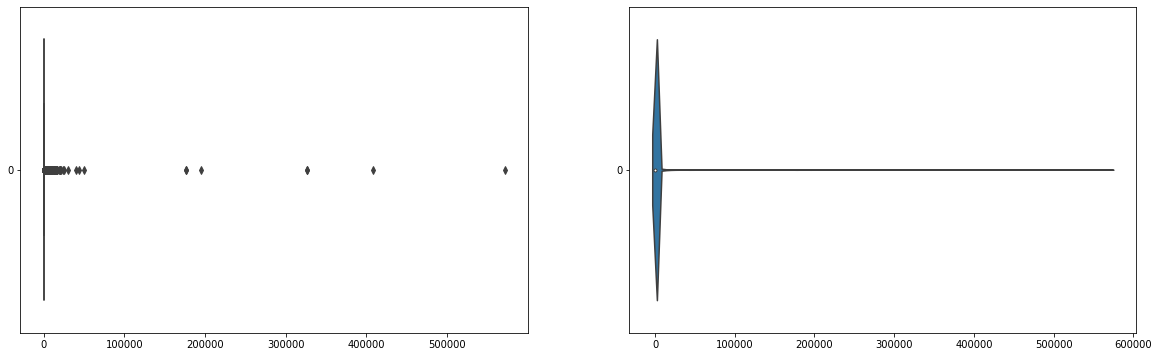

In [14]:
plot_boxplot_with_violinplot("iptu")

A partir dos gráficos acima e dos histogramas, podemos concluir que em geral temos vários valores extremos e que eles estão bem dispersos, por isso os boxplots e os violinplots ficaram muito distorcidos! Agora, vamos analisar a correlação entre os atributos contínuos

### Teste de normalidade 

In [15]:
def normality_test(key):
  t, p_value = stats.normaltest(df[key])
  return p_value >= 0.05

In [16]:
for col in cont_attributes:
  normal = "normal" if normality_test(col) else "não é normal"
  print(f"O atributo {col} {normal}" )

O atributo usableAreas não é normal
O atributo condoFee não é normal
O atributo rentPrice não é normal
O atributo iptu não é normal


Como já era de se esperar, os atributos não seguem uma distribuição normal.

## Análise dos dados ordinais

In [17]:
ord_cols = ["parkingSpaces", "suites", "bathrooms", "bedrooms"]

df[ord_cols].describe()

,parkingSpaces,suites,bathrooms,bedrooms
count,7492.000000,7492.000000,7492.000000,7492.000000
mean,1.251468,0.506674,0.506674,1.310198
std,10.053098,1.209950,1.209950,1.982876
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000
max,800.000000,42.000000,42.000000,70.000000



Em uma análise superficial, parecem existir alguns casos muito excepcionais no dataset! Um imóvel com 800 vagas?!

Podemos ver agora para cada atributo qual a frequência dos valores, vejamos:

In [18]:
def plot_countplots(keys, figsize, rotation=0):
  f = plt.figure(figsize=figsize)
  gs = f.add_gridspec(len(keys), 1)
  
  for i in range(len(keys)):
    f.add_subplot(gs[i, 0])
    plt.title(f"Contagem de valores do atributo {keys[i]}", fontsize=18)
    ax = sns.countplot(df[keys[i]])
    for label in ax.get_xticklabels():
      label.set(rotation=rotation)

/home/vini/University/fortaleza-rents-dataset/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vini/University/fortaleza-rents-dataset/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vini/University/fortaleza-rents-dataset/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

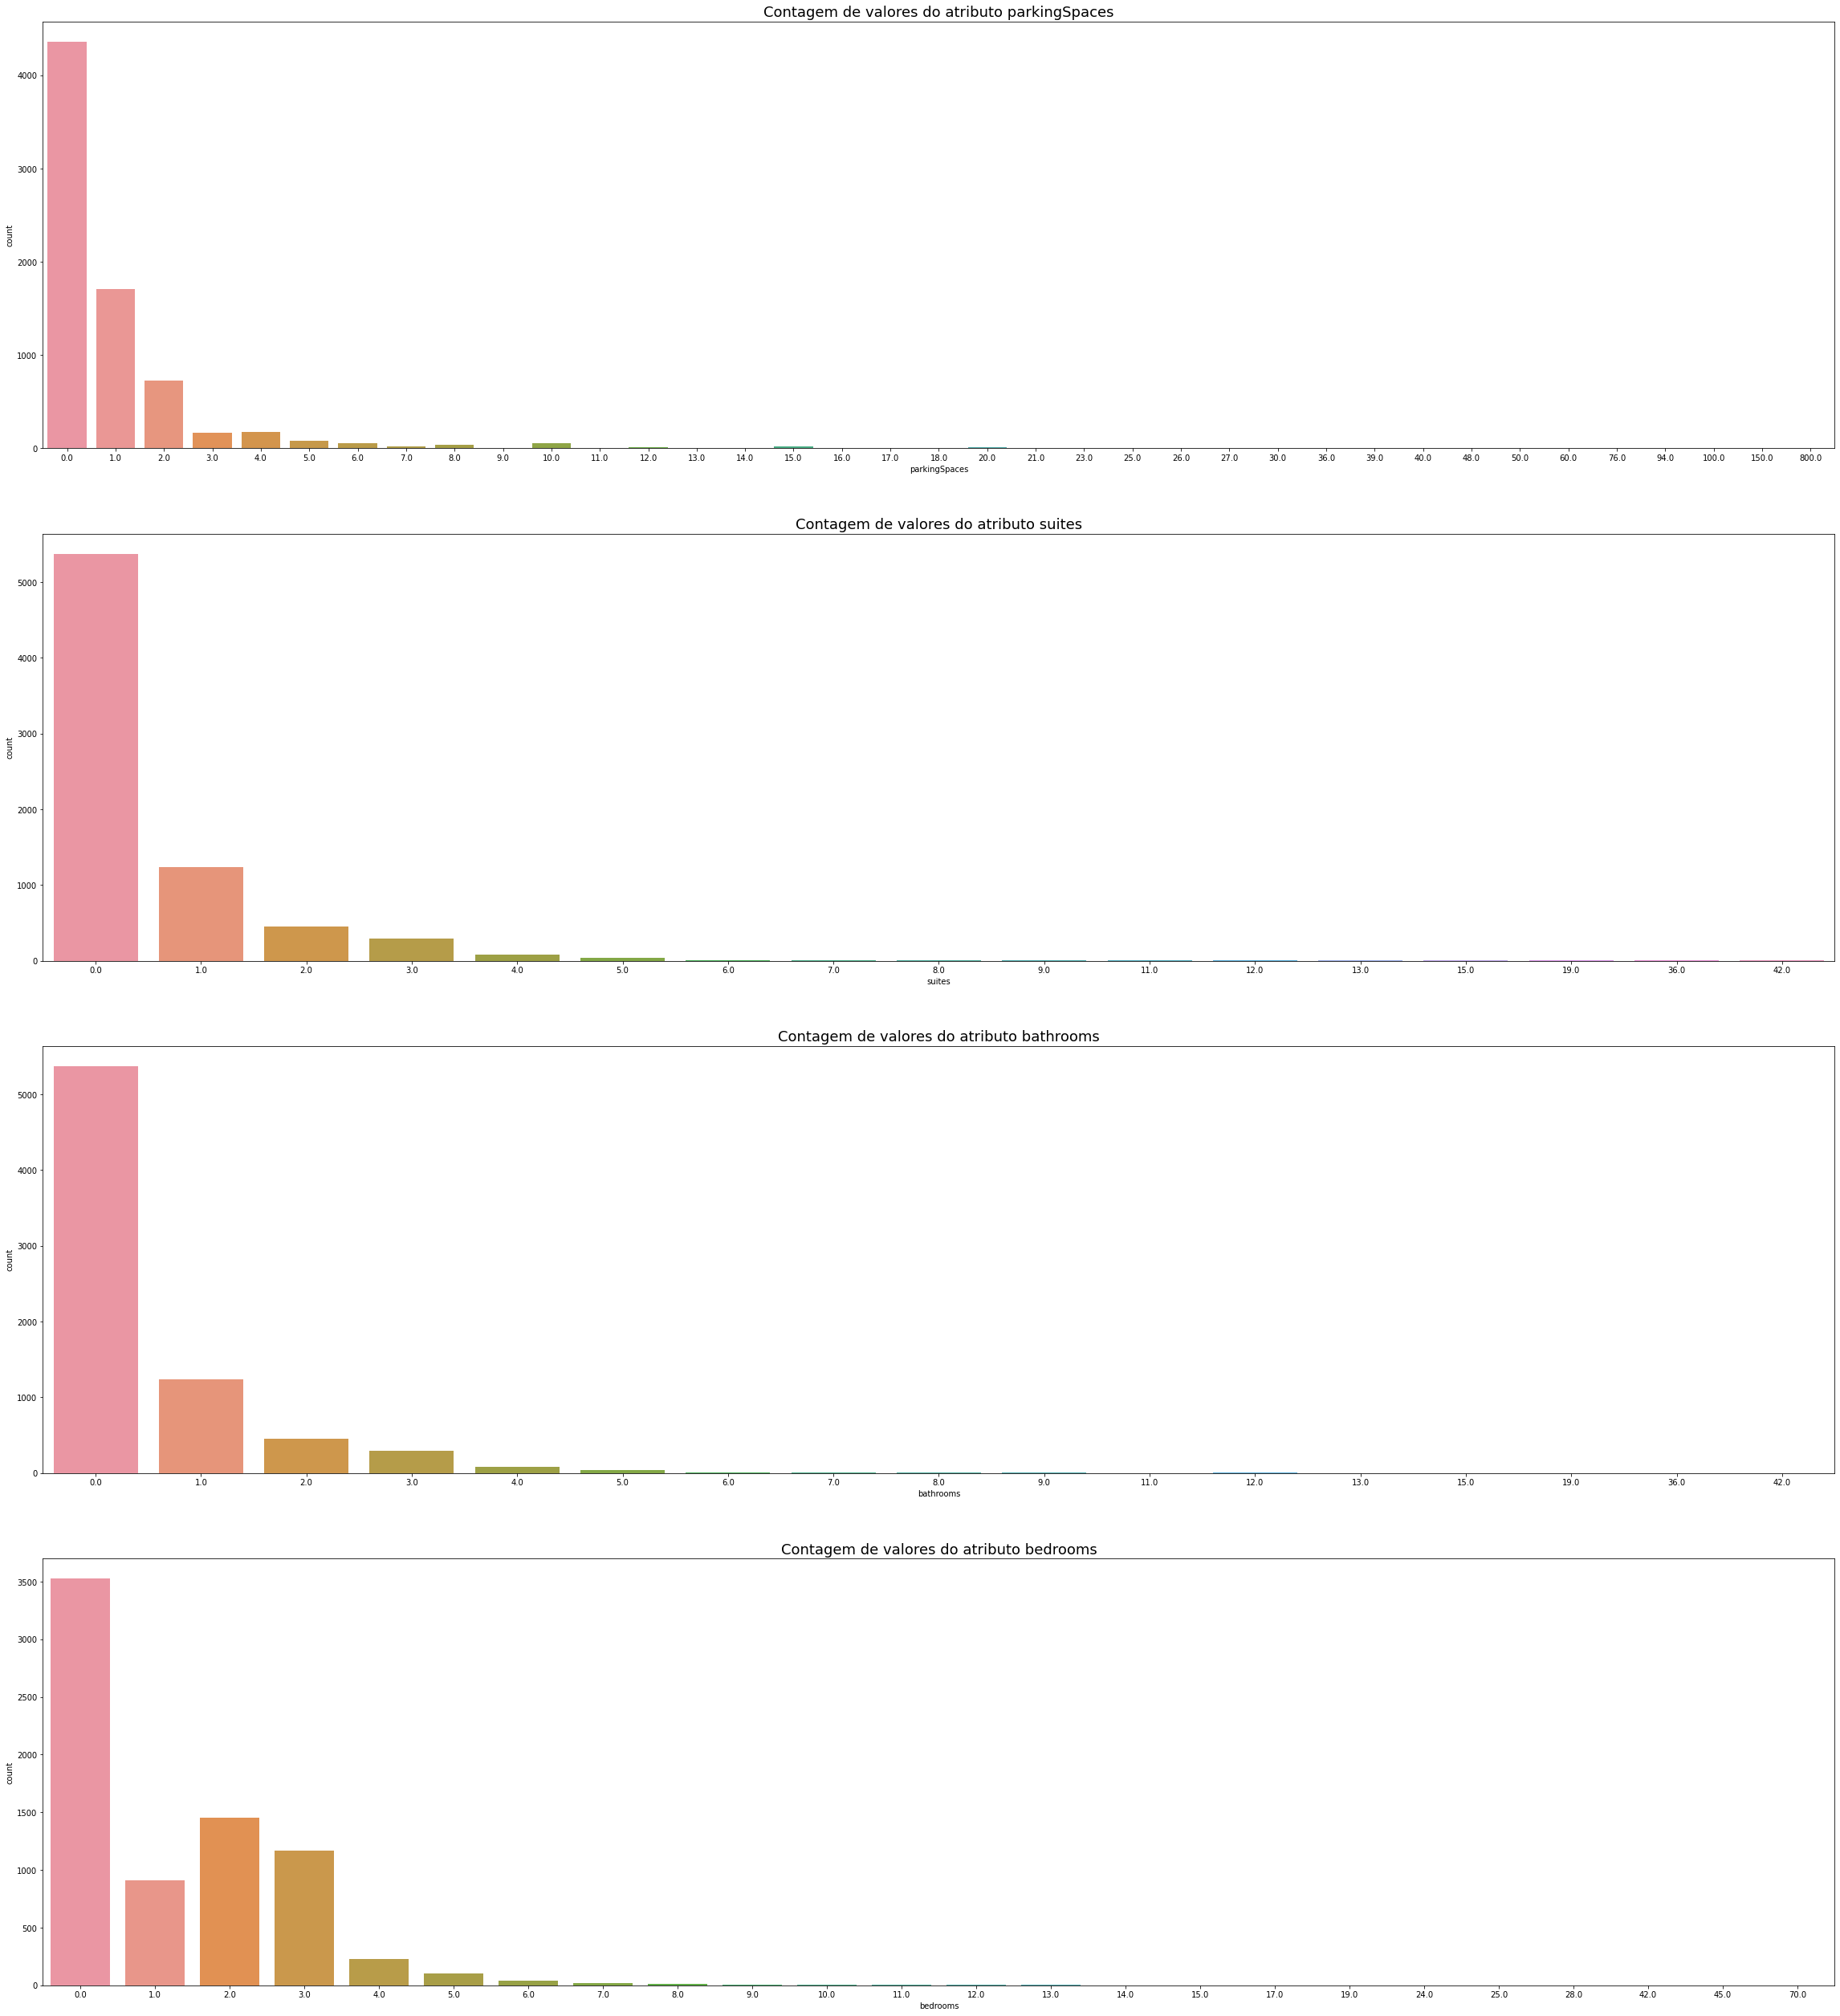

In [19]:
plot_countplots(ord_cols, figsize=(40, 45))

## Análise dos dados categóricos

No dataset, temos os seguintes atributos categóricos:

- amenities
- description
- title
- unitTypes
- usageTypes
- neighborhood

Entretanto, nesse momento, não vamos utilizar os atributos title nem description, pois são textuais e não vale a pena analisá-los no momento. Além disso, antes de analisar o atributo amenities, é necessário um pré processamento pois o atributo é uma lista de 'benefícios' presentes em um imóvel.

Abaixo, vamos verificar qual a frequência dos atributos unitTypes (indica o tipo do imóvel), usageTypes (indica a finalidade do imóvel) e neighbordhood (bairro do imóvel)

<AxesSubplot:title={'center':'Número de imóveis para aluguel por bairro'}, xlabel='neighborhood'>

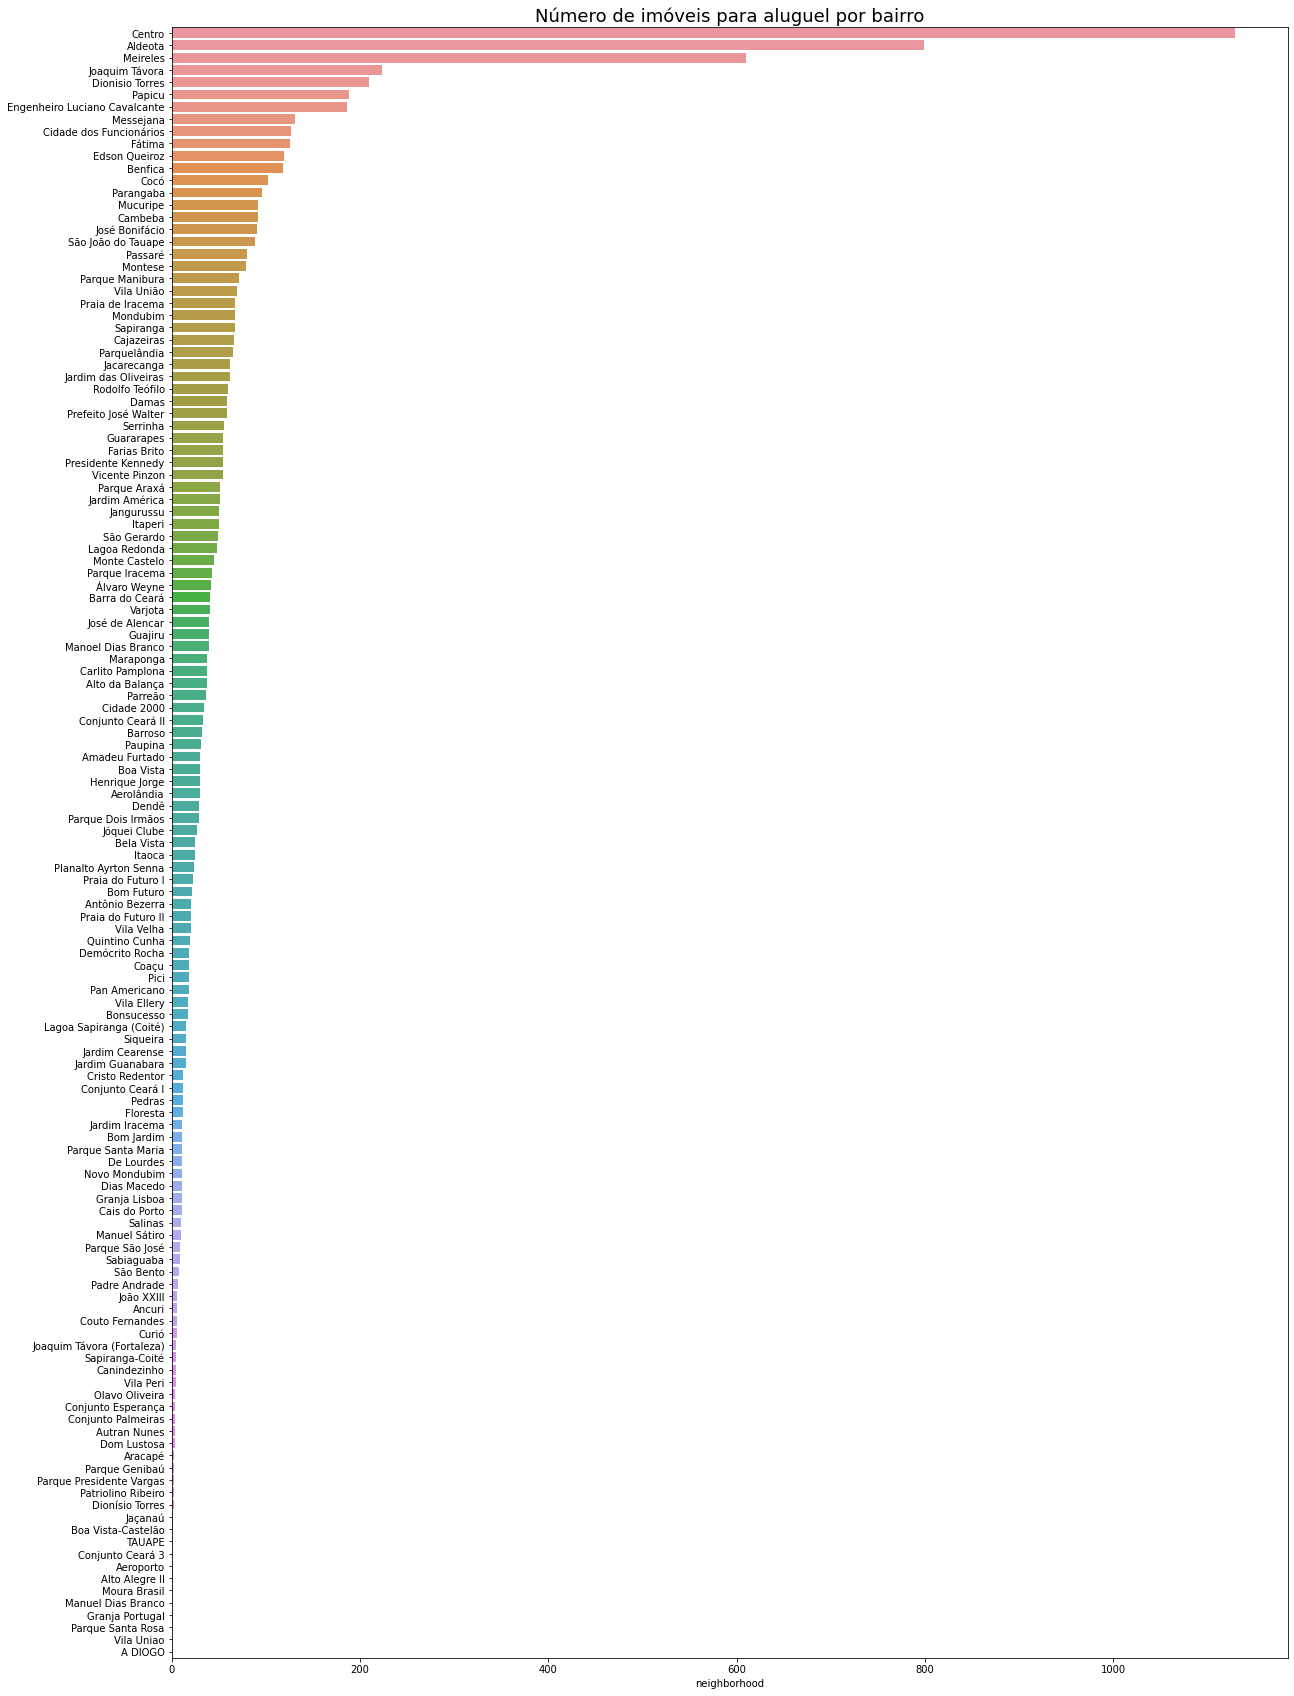

In [20]:
plt.figure(figsize=(20, 30))

neighborhood_df = df["neighborhood"].value_counts()

plt.title("Número de imóveis para aluguel por bairro", fontsize=18)

sns.barplot(y=neighborhood_df.index, x=neighborhood_df, orient='h')

/home/vini/University/fortaleza-rents-dataset/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vini/University/fortaleza-rents-dataset/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


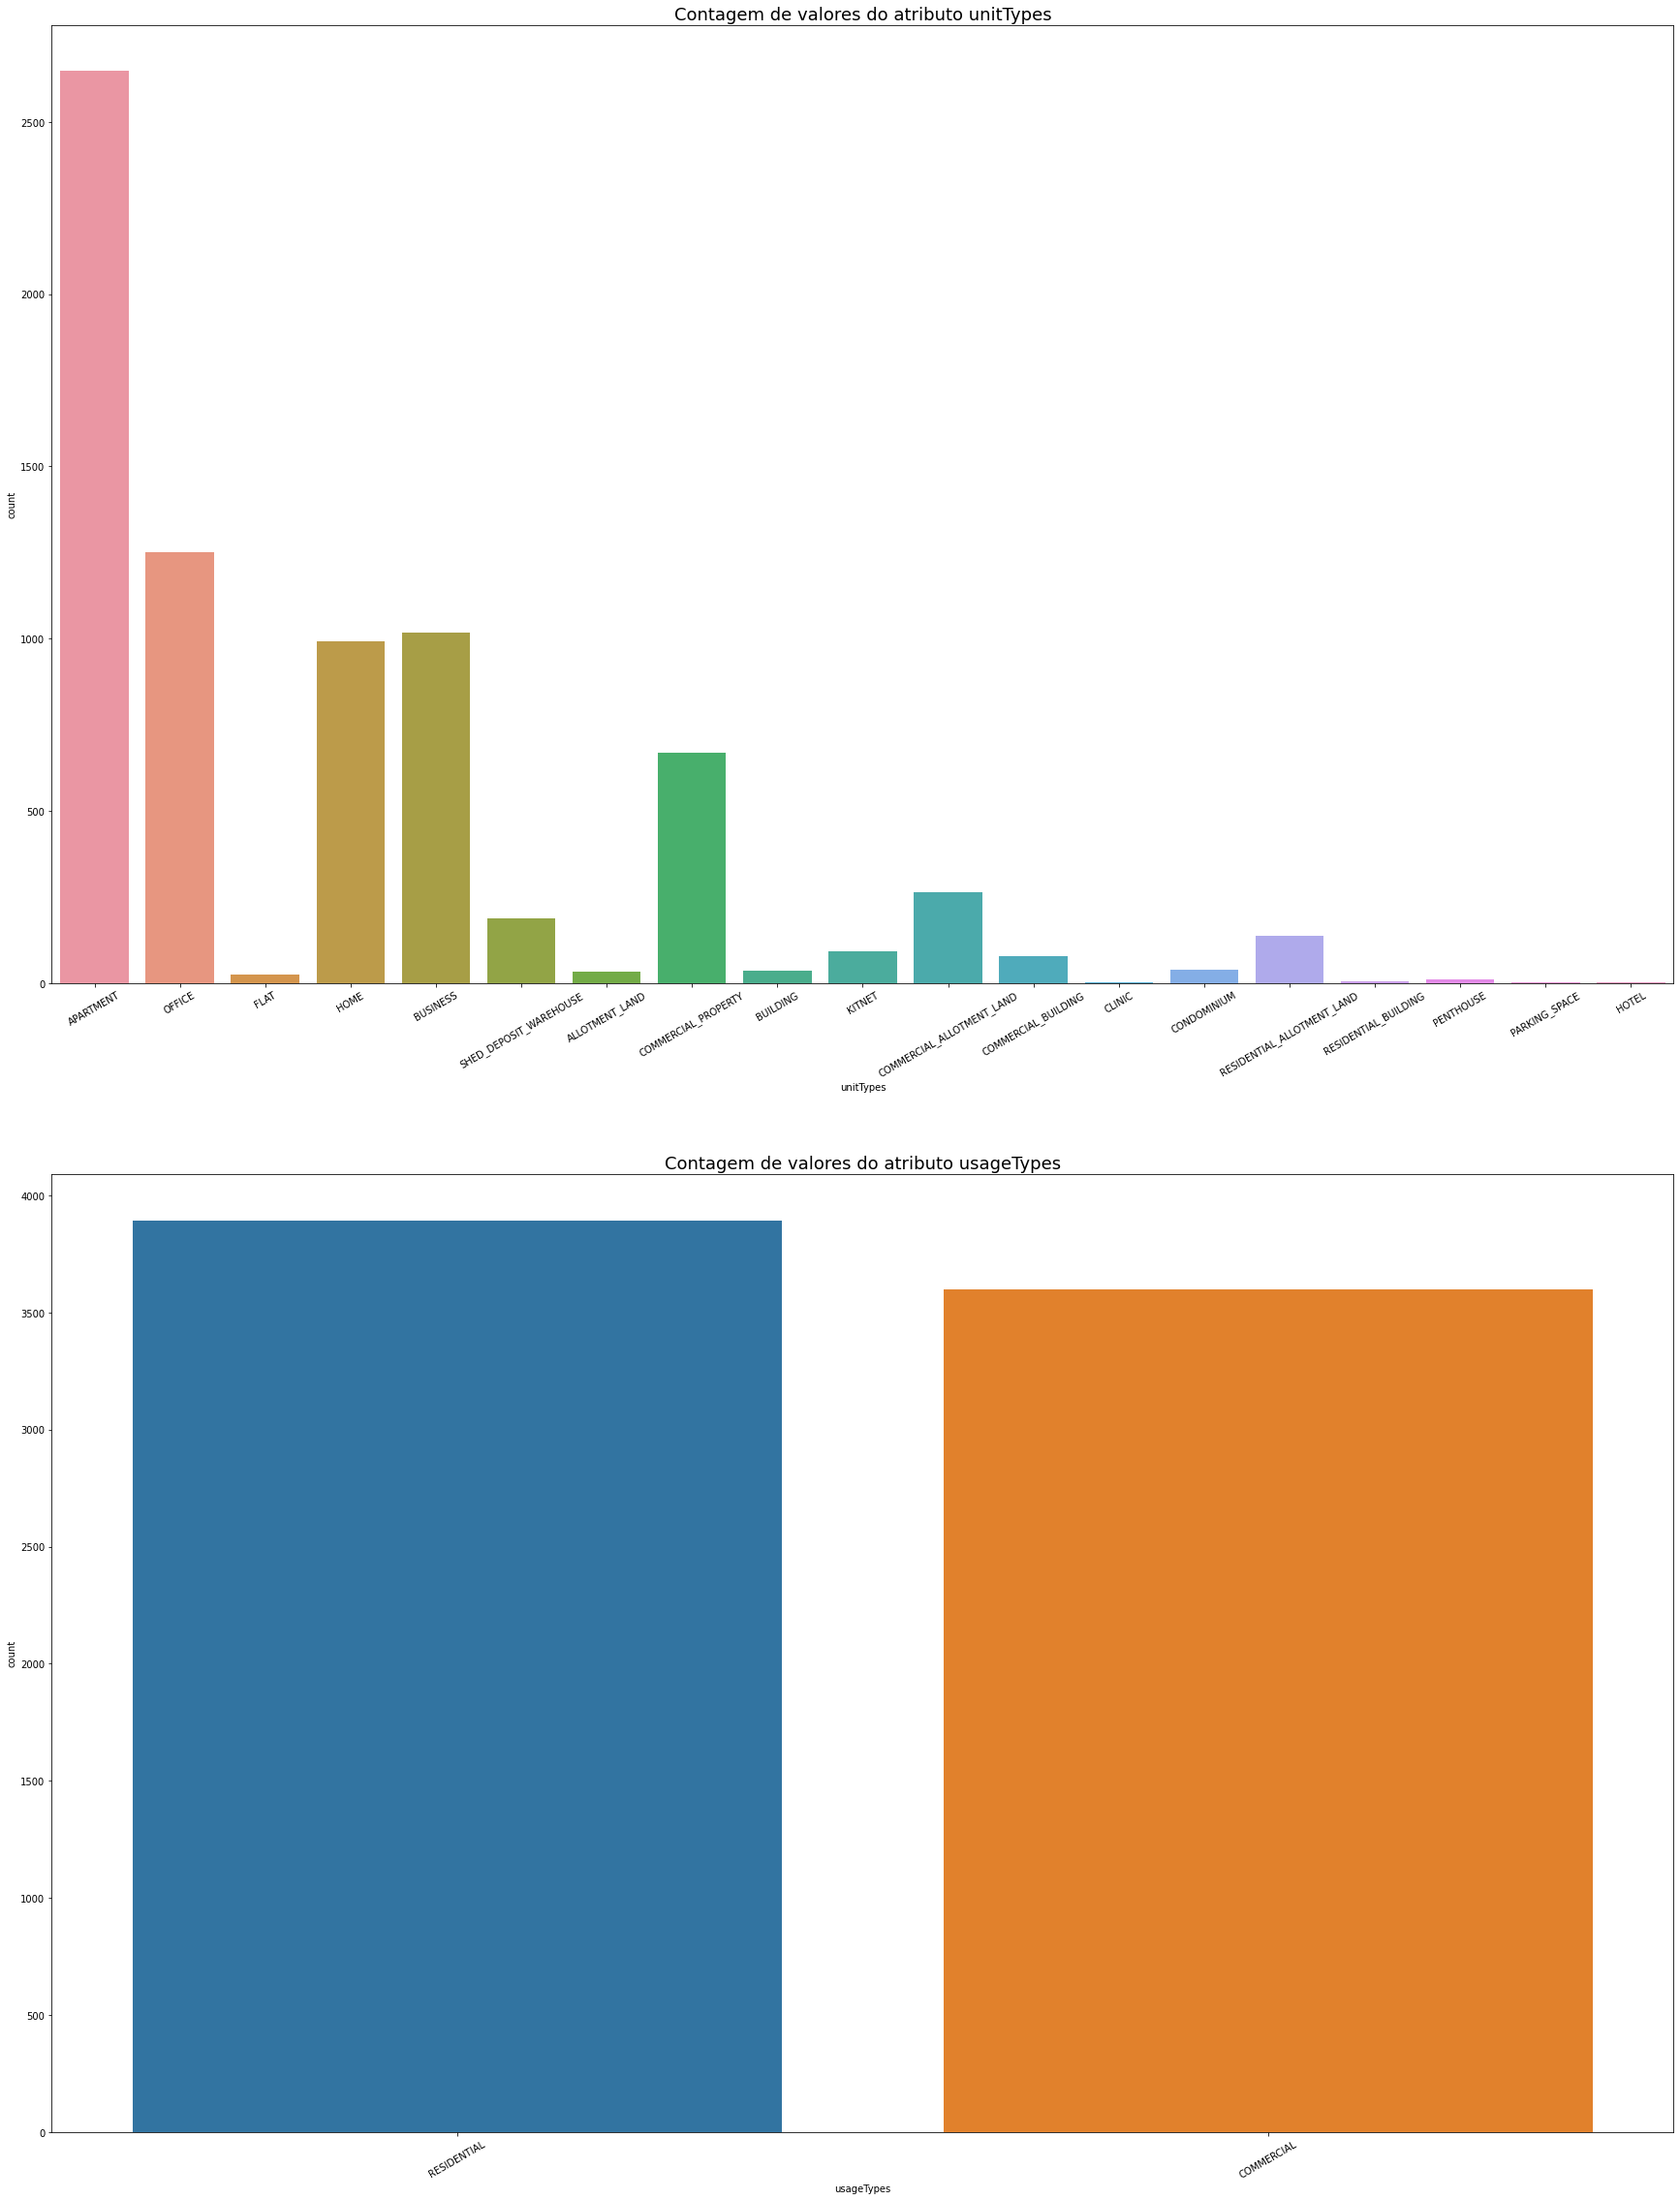

In [21]:
categorical_attributes = ["unitTypes", "usageTypes"]

plot_countplots(categorical_attributes, figsize=(30, 40), rotation = 30)

Por fim, podemos ver qual a distribuição de cada valor possível nas listas da coluna amenities.

In [22]:
from ast import literal_eval

df['amenities'] = df['amenities'].apply(literal_eval)

df_amenities_exploded = df.explode('amenities')

In [23]:
amenities_values = df_amenities_exploded['amenities'].value_counts()
amenities_values

KITCHEN             1837
SERVICE_AREA        1280
ELEVATOR             697
GATED_COMMUNITY      665
INTERCOM             643
                    ... 
BACKGROUND_HOUSE       1
VEGETABLE_GARDEN       1
POOL_BAR               1
COLD_FLOOR             1
DECLIVE                1
Name: amenities, Length: 168, dtype: int64

<AxesSubplot:title={'center':'Contagem de benefícios presentes nos imóveis'}, xlabel='amenities'>

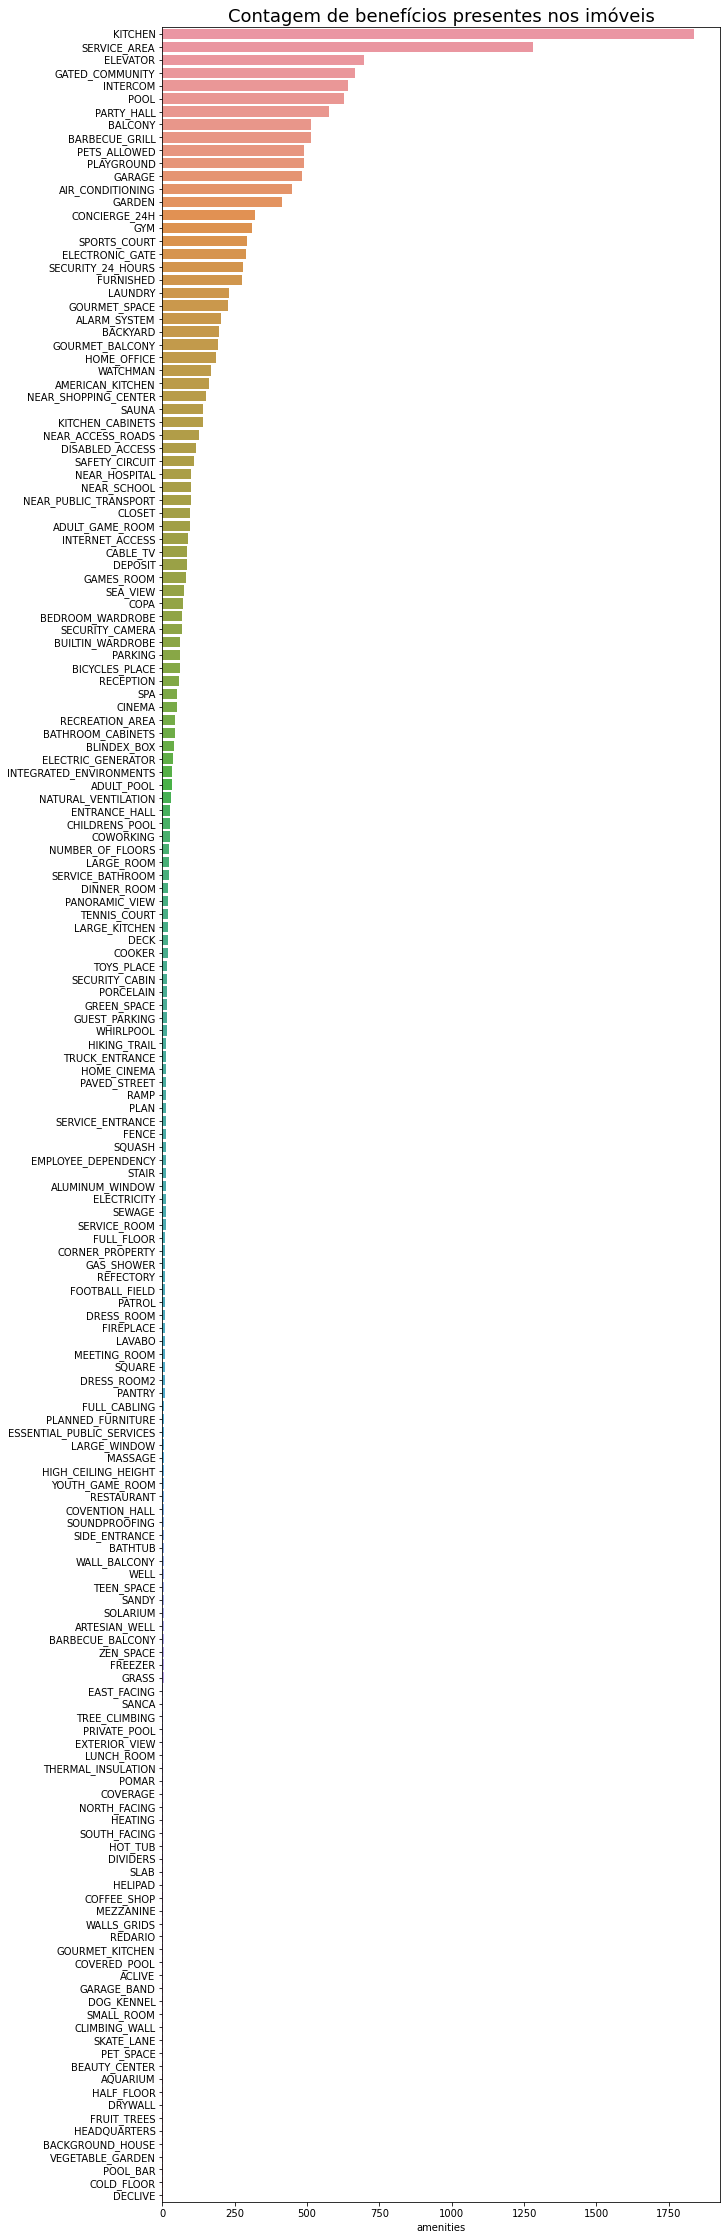

In [24]:
plt.figure(figsize=(10, 40))

plt.title("Contagem de benefícios presentes nos imóveis", fontsize=18)

sns.barplot(y=amenities_values.index, x=amenities_values, orient='h')

## Matrizes de correlação entre atributos numéricos (ordinais e contínuos)

Faremos o cálculo das matrizes de correlação entre os atributos numéricos utilizando o método de Spearman.

Utilizaremos o método de spearman aqui, pois as nossas variáveis não seguem uma distribuição normal (conforme nossos testes de normalidade sobre as variáveis contínuas)

In [25]:
def plot_corr_matrix(data, key, title):
    plt.figure(figsize=(16, 8))
    correlation = data[key].corr(method="spearman")
    mask = np.zeros_like(correlation, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(correlation, cmap='RdBu_r', annot=True, annot_kws={'size': 12}, mask=mask)
    plt.title(title, fontsize=18)
    plt.show()

/tmp/ipykernel_766988/1160079166.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


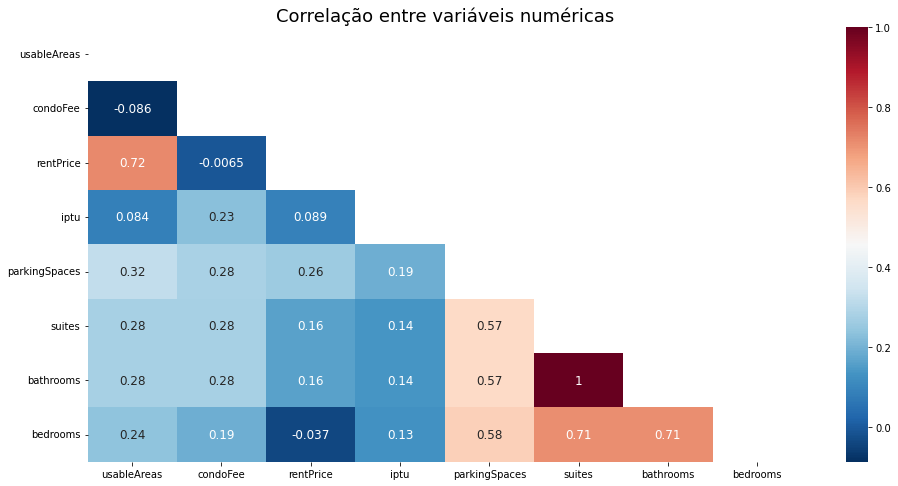

In [26]:
numeric_attributes = cont_attributes + ord_cols

plot_corr_matrix(df, numeric_attributes, "Correlação entre variáveis numéricas")

# Visualização dos dados

Além das visualizações que já foram utilizadas para ter uma visão inicial dos dados, vamos tentar responder as seguintes perguntas:

- O bairro influencia o aluguel? Quais os bairros com o maior aluguel médio?
- Em cada bairro, como estão distribuídos os alugueis? São todos altos, médio, etc?
- Segundo a matriz de correlação, existe uma correlação forte entre o valor do aluguel e a área do imóvel, é possível visualizar isso graficamente?

**Quais os bairros com o aluguel mais caro (em média)?**

<AxesSubplot:title={'center':'Média de aluguel por bairro'}, xlabel='rentPrice', ylabel='neighborhood'>

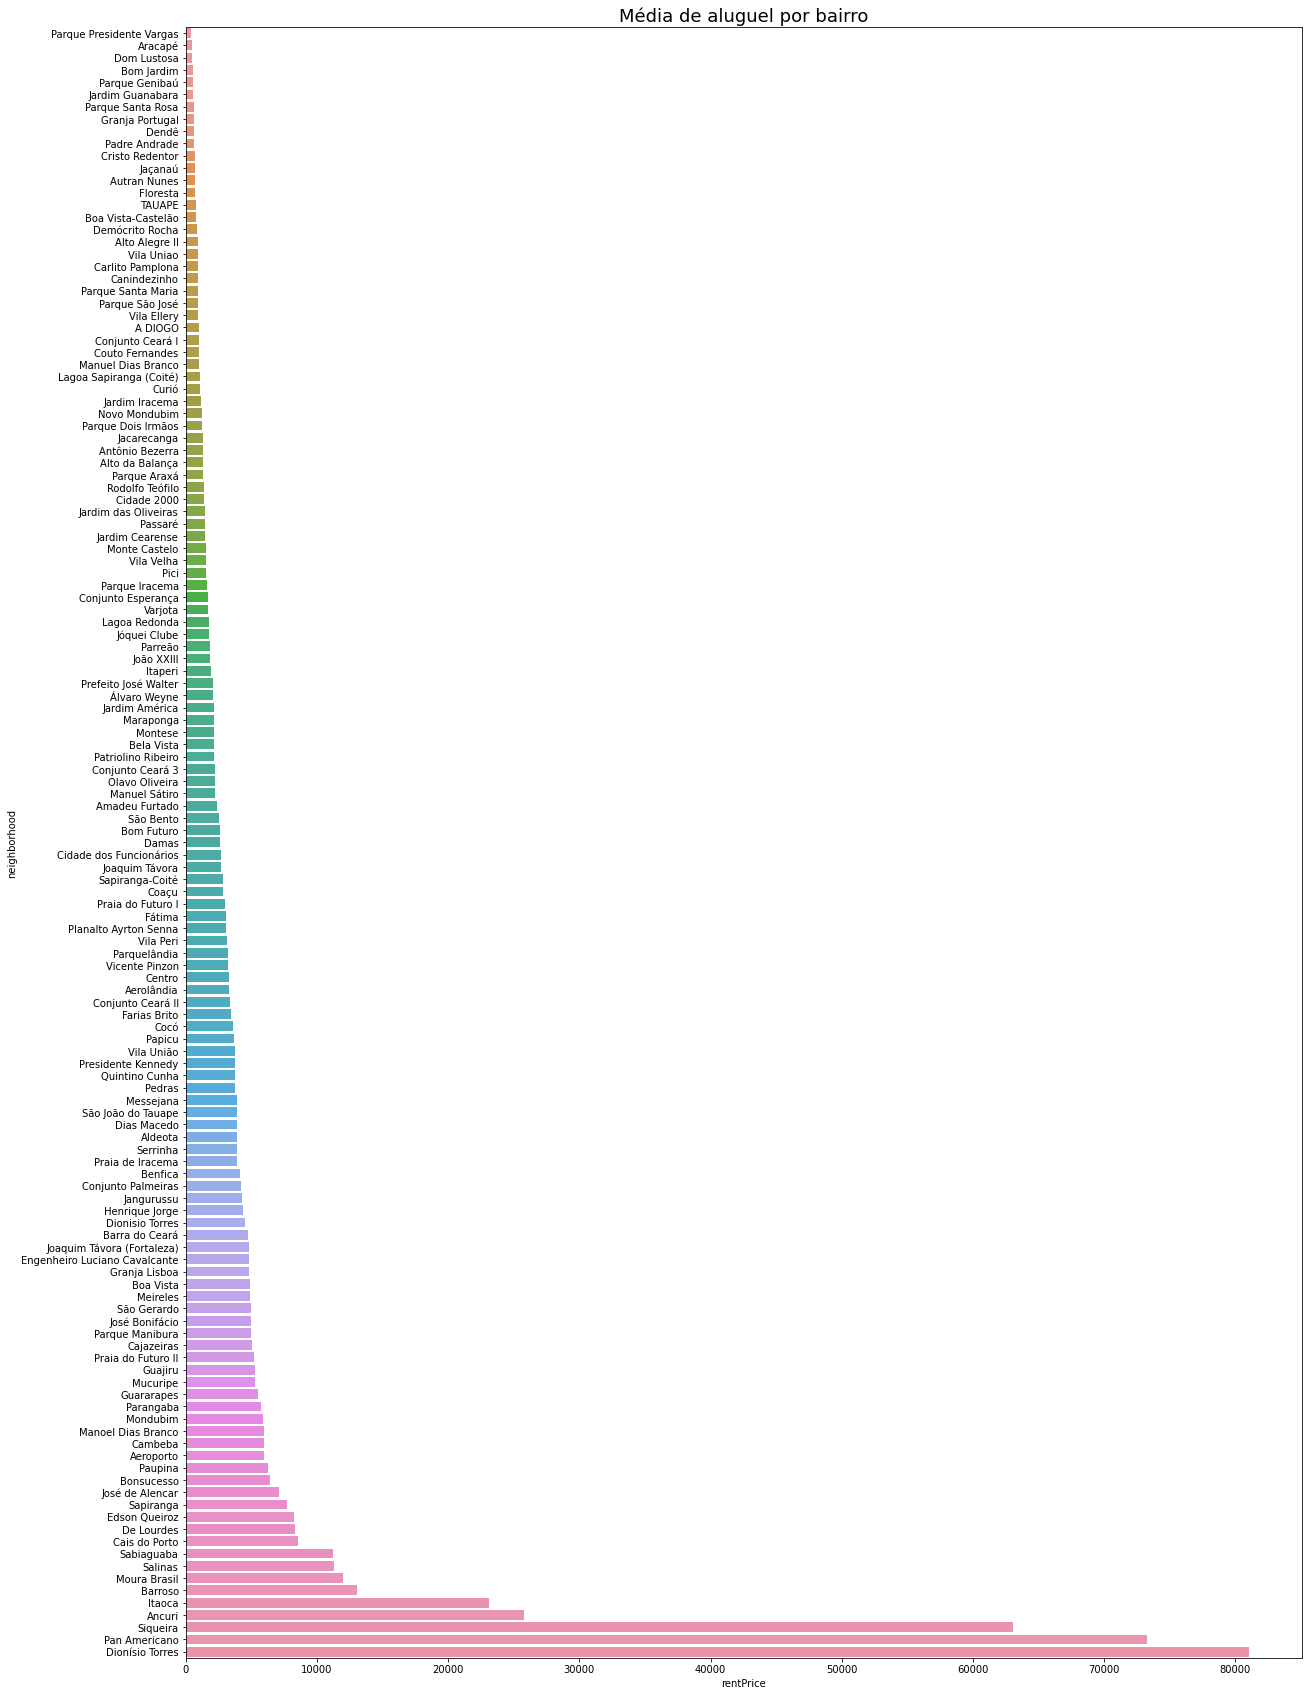

In [27]:
average_rent_price = df.groupby("neighborhood")["rentPrice"].mean().sort_values()

plt.figure(figsize=(20, 30))

plt.title("Média de aluguel por bairro", fontsize=18)

sns.barplot(y=average_rent_price.index, x=average_rent_price, orient='h')

Como podemos ver, o Dionísio Torres é o bairro com o aluguel médio mais caro. Podemos analisar também os imóveis do dionísio torres para entender porque a sua média está tão 'alta'

In [28]:
df[df["neighborhood"] == 'Dionísio Torres']

,amenities,usableAreas,description,title,unitTypes,parkingSpaces,suites,bathrooms,usageTypes,bedrooms,neighborhood,lat,lon,condoFee,rentPrice,iptu
6387,[KITCHEN],5167.0,"Prédio comercial medindo 5.167m², com terreno ...","PRÉDIO para aluguel, Joaquim Távora - FORTALEZ...",COMMERCIAL_PROPERTY,0.0,0.0,0.0,COMMERCIAL,0.0,Dionísio Torres,-3.730451,-38.521799,0,150000,194671
6667,[],366.0,JOAQUIM TAVORA - SALA - AV. BARÃO DE STUDART N...,JOAQUIM TAVORA - SALA - AV. BARÃO DE STUDART N...,OFFICE,0.0,0.0,0.0,COMMERCIAL,0.0,Dionísio Torres,-3.744155,-38.510038,3950,12000,0


Como o Dionísio torres possui somente dois imóveis com valor muito acima da média, isso afeta bastante o preço médio do aluguel no bairro. Além disso, esses valores de alugueis estão sendo afetados pela presença de outliers no dataset, portanto, isso precisará ser tratado antes de usar o dataset para criação de um modelo capaz de predizer o preço dos imóveis.

**Dentro de um bairro, como são distribuídos os alugueis?**



<AxesSubplot:xlabel='rentPrice', ylabel='neighborhood'>

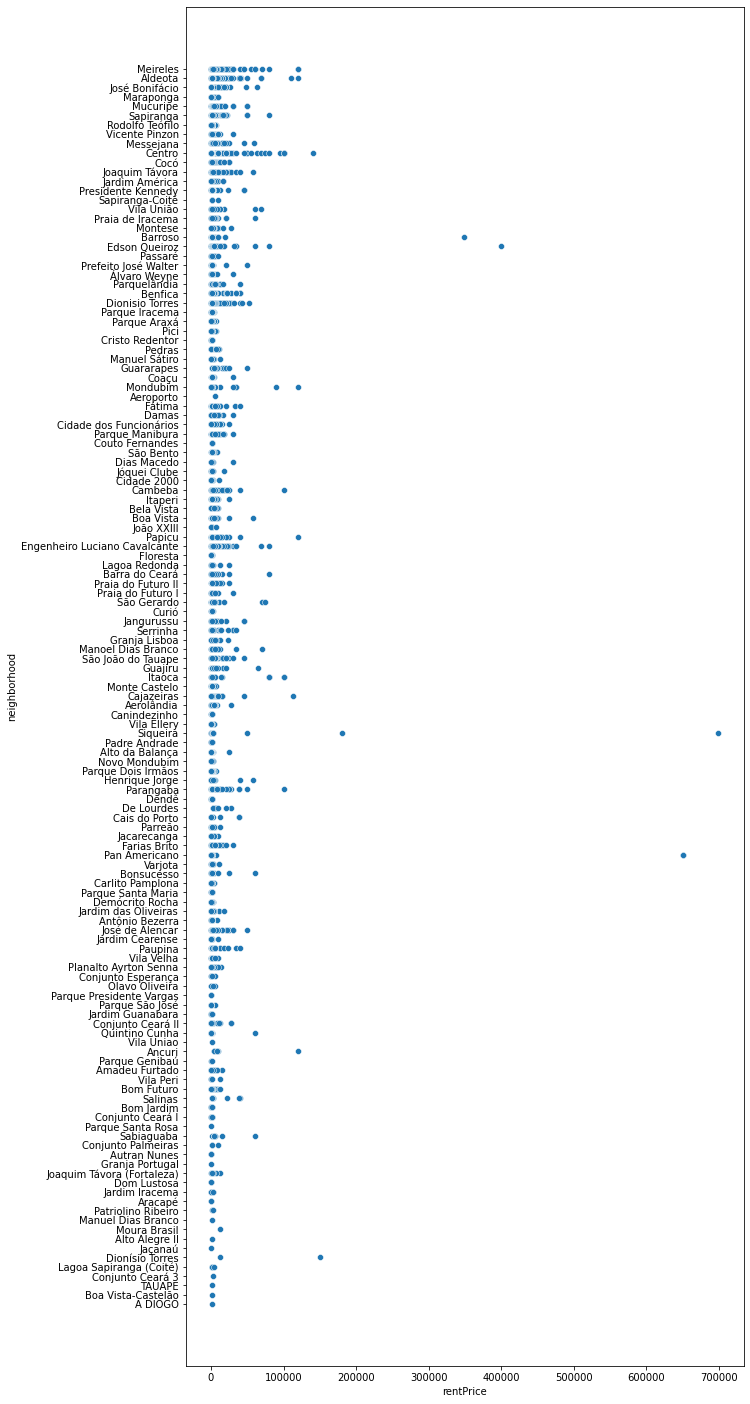

In [29]:
plt.figure(figsize=(10, 25))

sns.scatterplot(x="rentPrice", y="neighborhood", data=df)

**É possível visualizar a correlação entre a área do imóvel e o valor do seu aluguel?**

<AxesSubplot:xlabel='usableAreas', ylabel='rentPrice'>

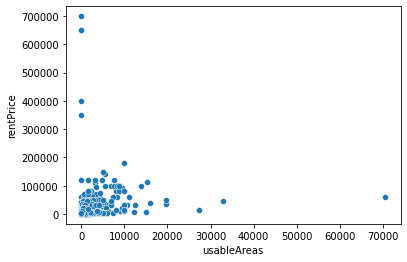

In [30]:
sns.scatterplot(x="usableAreas", y="rentPrice", data=df)

A princípio, não está tão claro a relação entre os dois atributos, no máximo é possível ver que quando a área diminui, o valor do aluguel também tende a diminuir, para facilitar a visualização, vamos limpar um pouco da poluição na escala introduzida pela presença de valores extremos tanto na área quanto no preço.

<AxesSubplot:xlabel='usableAreas', ylabel='rentPrice'>

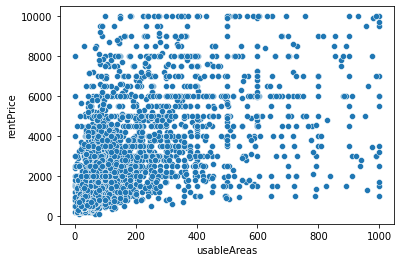

In [31]:
rents_df_low_areas = df[(df["rentPrice"] <= 10000) & (df["usableAreas"] <= 1000)]
sns.scatterplot(x="usableAreas", y="rentPrice", data=rents_df_low_areas)

Agora sim! Note que a medida que a área aumenta, os preços tendem a subir (por mais que existam alguns preços que diminuam, isso pode acontecer devido a outros fatores não necessariamente relacionados a área do imóvel, como o bairro do imóvel)